HW3 - standard-identification-deeplearning



SubHW3-1:

A) Dataset Loading and Exploration

This is the first part of HW3_1 from the course Standard Identification with Deep Learning.

It focuses on loading and exploring the seeds_dataset.txt file, which contains multivariate data related to wheat kernels.

The dataset is loaded using pandas.read_csv() with whitespace delimiter.

Column names are assigned for better readability and analysis:
Area, Perimeter, Compactness, Kernel Length, Kernel Width,
Asymmetry Coefficient, Kernel Groove Length, Class

The shape and preview of the dataset are printed for verification.

This step sets the foundation for further data processing and classification in upcoming subassignments.



In [ ]:
import pandas as pd

# Load the dataset from the local Colab environment
df = pd.read_csv("seeds_dataset.txt", sep="\s+", header=None, engine="python")

# Assign column names
df.columns = ['Area', 'Perimeter', 'Compactness', 'Kernel_Length', 'Kernel_Width',
              'Asymmetry_Coeff', 'Kernel_Groove_Length', 'Class']

# Print confirmation and dataset shape
print(" Dataset loaded successfully!")
print(f"Shape of dataset: {df.shape}\n")

# Preview the first few rows
df.head()


 Dataset loaded successfully!
Shape of dataset: (210, 8)



,Area,Perimeter,Compactness,Kernel_Length,Kernel_Width,Asymmetry_Coeff,Kernel_Groove_Length,Class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


B) Distance and Similarity Matrix Calculation

This section begins by loading the dataset from the 'seeds_dataset.txt' file into a NumPy array.

Two functions are defined:

euclidean_distance(x, y): Calculates the Euclidean distance between two points.

cosine_similarity(x, y): Computes the cosine similarity between two vectors as the dot product divided by the product of their magnitudes.

Next, the code computes and stores the pairwise distances between all data points in two separate matrices: one for Euclidean distance and one for cosine similarity.

These matrices are then printed and visualized using Matplotlib to observe the spatial and angular relationships between samples.

Euclidean Distance Matrix:
 [[0.         1.33357752 1.45343524 ... 6.56385255 4.10525057 4.80520091]
 [1.33357752 0.         1.86846948 ... 7.5510321  4.25991021 5.4535927 ]
 [1.45343524 1.86846948 0.         ... 5.74283431 2.81075033 3.65328627]
 ...
 [6.56385255 7.5510321  5.74283431 ... 0.         4.94612782 2.85502049]
 [4.10525057 4.25991021 2.81075033 ... 4.94612782 0.         2.10007516]
 [4.80520091 5.4535927  3.65328627 ... 2.85502049 2.10007516 0.        ]]

Cosine Distance Matrix:
 [[ 0.00000000e+00  1.35054282e-03  4.93186736e-04 ...  4.14648868e-02
   6.47522909e-03  1.80693391e-02]
 [ 1.35054282e-03 -2.22044605e-16  3.14545750e-03 ...  5.72053279e-02
   1.23361229e-02  2.86470270e-02]
 [ 4.93186736e-04  3.14545750e-03  0.00000000e+00 ...  3.38639033e-02
   4.35603674e-03  1.33755484e-02]
 ...
 [ 4.14648868e-02  5.72053279e-02  3.38639033e-02 ... -2.22044605e-16
   2.06852550e-02  5.94830437e-03]
 [ 6.47522909e-03  1.23361229e-02  4.35603674e-03 ...  2.06852550e-02
   0.00

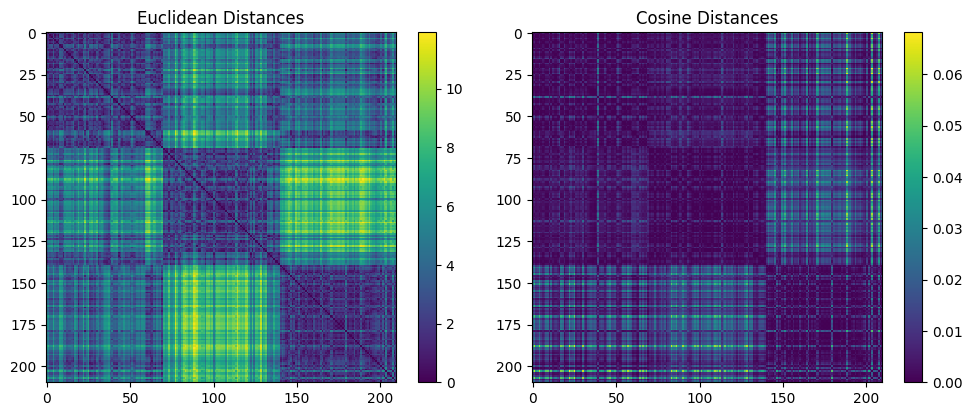

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Convert DataFrame to NumPy array (excluding the class label)
data = df.iloc[:, :-1].values  # All columns except 'Class'

# Define Euclidean distance between two points
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

# Define cosine similarity and convert it to cosine distance
def cosine_distance(x, y):
    return 1 - (np.dot(x, y) / (norm(x) * norm(y)))

# Number of samples
num_samples = data.shape[0]

# Initialize distance matrices
euclidean_matrix = np.zeros((num_samples, num_samples))
cosine_matrix = np.zeros((num_samples, num_samples))

# Compute distances for all pairs
for i in range(num_samples):
    for j in range(num_samples):
        euclidean_matrix[i, j] = euclidean_distance(data[i], data[j])
        cosine_matrix[i, j] = cosine_distance(data[i], data[j])

# Print matrices
print("Euclidean Distance Matrix:\n", euclidean_matrix)
print("\nCosine Distance Matrix:\n", cosine_matrix)

# Visualize the distance matrices
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(euclidean_matrix, cmap='viridis', interpolation='nearest')
plt.title("Euclidean Distances")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(cosine_matrix, cmap='viridis', interpolation='nearest')
plt.title("Cosine Distances")
plt.colorbar()

plt.tight_layout()
plt.show()


C) KMeans Clustering and Silhouette Analysis

This sub-assignment evaluates clustering quality on the wheat seed dataset using the Silhouette Score metric.

KMeans clustering is performed for k values ranging from 2 to 10. For each clustering result, the average Silhouette Score is computed to quantify how well-separated and cohesive the clusters are.

The code prints each silhouette score and visualizes how the score varies with the number of clusters using a line plot.

This analysis helps identify the most appropriate number of clusters (optimal k) for this dataset.


For k = 2, Silhouette Score = 0.5183
For k = 3, Silhouette Score = 0.4719
For k = 4, Silhouette Score = 0.3954
For k = 5, Silhouette Score = 0.3674
For k = 6, Silhouette Score = 0.3608
For k = 7, Silhouette Score = 0.3542
For k = 8, Silhouette Score = 0.3625
For k = 9, Silhouette Score = 0.3574
For k = 10, Silhouette Score = 0.3633


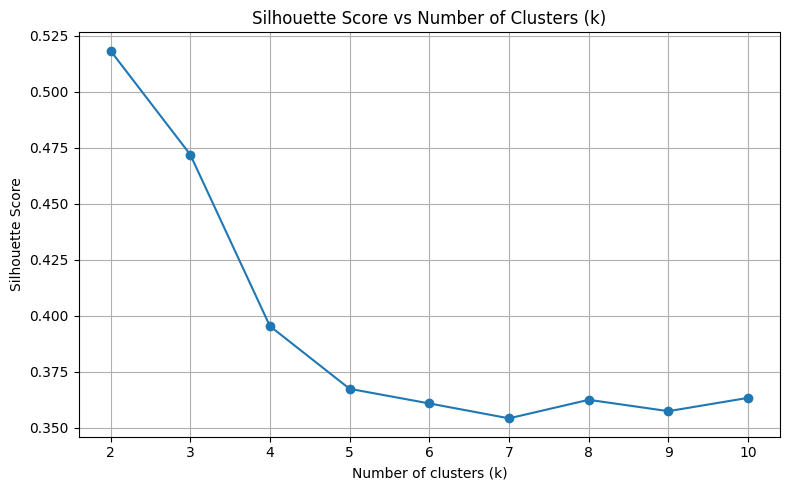

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Store silhouette scores for k = 2 to 10
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)
    score = silhouette_score(data, labels)
    silhouette_scores.append(score)

# Print silhouette scores
for k, score in enumerate(silhouette_scores, start=2):
    print(f"For k = {k}, Silhouette Score = {score:.4f}")

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs Number of Clusters (k)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(range(2, 11))
plt.tight_layout()
plt.show()

D) Rand Index Evaluation for KMeans Clustering

In this part, the dataset is first separated into features (X) and true labels (y). KMeans clustering is performed 5 times with fixed parameters (3 clusters, random centroid initialization, fixed random seed).

For each run:
- The predicted cluster labels are compared against the true labels using the Adjusted Rand Index.
- The score is stored and printed.

After all runs, the code computes and displays:
- The mean of the 5 Adjusted Rand Index scores.
- The variance across the 5 runs.

This helps assess clustering stability and how well the unsupervised KMeans results match the ground truth labels.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Prepare the dataset from DataFrame
data_array = df.to_numpy()

# Split into features (X) and true labels (y)
X = data_array[:, :-1]  # All columns except the last
y = data_array[:, -1]   # Last column is the class label

# Run KMeans multiple times and compute Rand Index
rand_indexes = []

for i in range(5):
    kmeans = KMeans(n_clusters=3, init='random', n_init=10, random_state=0)
    kmeans.fit(X)
    predicted_labels = kmeans.labels_

    # Compute adjusted Rand index
    score = adjusted_rand_score(y, predicted_labels)
    rand_indexes.append(score)
    print(f"Run {i+1}: Adjusted Rand Index = {score:.4f}")

# Final statistics
mean_rand = np.mean(rand_indexes)
var_rand = np.var(rand_indexes)

print(f"\nMean Adjusted Rand Index over 5 runs: {mean_rand:.4f}")
print(f"Variance of Rand Index: {var_rand:.6f}")


Run 1: Adjusted Rand Index = 0.7166
Run 2: Adjusted Rand Index = 0.7166
Run 3: Adjusted Rand Index = 0.7166
Run 4: Adjusted Rand Index = 0.7166
Run 5: Adjusted Rand Index = 0.7166

Mean Adjusted Rand Index over 5 runs: 0.7166
Variance of Rand Index: 0.000000
